In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt


In [2]:
# Leemos la imagen
#=================
img = cv.imread('eyes.jpg')
#img = cv.imread('eyes.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Suavizamos la imagen
#=====================
gray = cv.medianBlur(gray,5)

cv.imshow('eyes',img)
cv.waitKey(0)
cv.destroyAllWindows()

Ordenado segun col 2: 
 [[455  79  30]
 [150  79  30]
 [461 181  32]
 [144 190  31]
 [451 290  34]
 [138 296  30]
 [135 412  32]
 [464 419  29]
 [133 505  33]
 [464 515  31]]


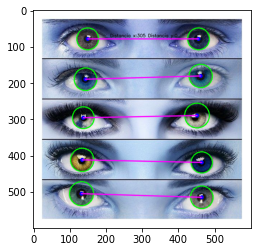

-1

In [85]:
# OBTENCION DE CIRCULOS CORRESPONDIENTES A LAS IRIS
# (imagen en grises, método, flag de resolución del acumulador, dist mín entre centros de círculos
# umbral alto de Canny, umbral del acumulador (votacion), radio_min, radio_max)
#===================================================================
img_out = img.copy()
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1.12,minDist=80,param1=130,param2=38,minRadius=15,maxRadius=44)
#uno bueno: 1.12;80;130;38;15;44

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),3,(0,0,255),3)

circles2d = circles[0]
#print ('Ubicacion de circulos:\n',circles2d)

#sorted_circles2d = circles2d[np.argsort(circles2d[:, 1])] #FUNCA
#sorted_circles2d = circles2d[np.lexsort(circles2d.T[1])]  #NO FUNCA
sorted_circles2d = circles2d[circles2d[...,1].argsort()]   #FUNCA  
#sorted_circles2d = np.sort(circles2d,axis=1)              #NO FUNCA
print ('Ordenado segun col 2: \n',sorted_circles2d)


#ARMO LINEA DE CENTRO A CENTRO DE CADA OJO
#for i in sorted_circles2d[0,:]:
    # Dibujo linea de centro a centro
 #   cv.line(img_out,(i[0],i[1]),(i+1[0],i+1[1]),(0,255,0),2,cv.LINE_AA)

a = sorted_circles2d

#ARMO LINEAS A LO BRUTO

#for i in a[0,:]:
cv.line(img_out,(a[0][0],a[0][1]),(a[1][0],a[1][1]),(255,0,255),2,cv.LINE_AA)
cv.line(img_out,(a[2][0],a[2][1]),(a[3][0],a[3][1]),(255,0,255),2,cv.LINE_AA)
cv.line(img_out,(a[4][0],a[4][1]),(a[5][0],a[5][1]),(255,0,255),2,cv.LINE_AA)
cv.line(img_out,(a[6][0],a[6][1]),(a[7][0],a[7][1]),(255,0,255),2,cv.LINE_AA)
cv.line(img_out,(a[8][0],a[8][1]),(a[9][0],a[9][1]),(255,0,255),2,cv.LINE_AA)

#COLOCO TEXTO INDICANDO SEPARACION ENTRE LAS IRIS
img_out2 = img_out.copy()

#posicion texto i
dist_x,dist_y = np.absolute(a[0][0]-a[1][0]),np.absolute(a[0][1]-a[1][1])
pos_x,pos_y = np.int_((a[0][0]+a[1][0])/2), np.int_((a[0][1]+a[1][1])/2 - 5)
texto = 'Distancia x:' + str(dist_x) + ' Distancia y:'+str(dist_y)
#texto
cv.putText(img_out2,str(texto),(pos_x-90,pos_y),cv.FONT_HERSHEY_SIMPLEX,0.4,(0,0,0),1,cv.LINE_AA)




plt.imshow(img_out2)
plt.show()  

cv.imshow('detected Iris',img_out2)
cv.waitKey(0)

Ordenado segun col 2: 
 [[454  80  12]
 [150  80  11]
 [462 183  11]
 [144 189  11]
 [445 294  15]
 [138 294  11]
 [132 506  15]
 [463 515  12]]


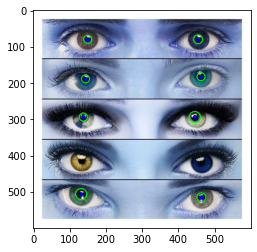

In [103]:
# OBTENCION DE CIRCULOS CORRESPONDIENTES A LAS PUPILAS
# (imagen en grises, método, flag de resolución del acumulador, dist mín entre centros de círculos
# umbral alto de Canny, umbral del acumulador (votacion), radio_min, radio_max)
#===================================================================

img_out = img.copy()
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1.3,minDist=100,param1=1,param2=30,minRadius=10,maxRadius=16)
#uno bueno: 1.3;100;1;30;10;16

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),3,(0,0,255),3)

#paso a matriz de 2d
circles2d = circles[0]

sorted_circles2d = circles2d[circles2d[...,1].argsort()]   #FUNCA  
print ('Ordenado segun col 2: \n',sorted_circles2d)



cv.imshow('detected Iris',img_out)
cv.waitKey(0)
plt.imshow(img_out)
plt.show()  


In [97]:
#ARMO LINEA DE CENTRO A CENTRO DE CADA OJO
#for i in sorted_circles2d[0,:]:
    # Dibujo linea de centro a centro
 #   cv.line(img_out,(i[0],i[1]),(i+1[0],i+1[1]),(0,255,0),2,cv.LINE_AA)

a = sorted_circles2d

#ARMO LINEAS A LO BRUTO

#for i in a[0,:]:
cv.line(img_out,(a[0][0],a[0][1]),(a[1][0],a[1][1]),(255,0,255),2,cv.LINE_AA)
cv.line(img_out,(a[2][0],a[2][1]),(a[3][0],a[3][1]),(255,0,255),2,cv.LINE_AA)
cv.line(img_out,(a[4][0],a[4][1]),(a[5][0],a[5][1]),(255,0,255),2,cv.LINE_AA)
cv.line(img_out,(a[6][0],a[6][1]),(a[7][0],a[7][1]),(255,0,255),2,cv.LINE_AA)
cv.line(img_out,(a[8][0],a[8][1]),(a[9][0],a[9][1]),(255,0,255),2,cv.LINE_AA)

#COLOCO TEXTO INDICANDO SEPARACION ENTRE LAS IRIS
img_out2 = img_out.copy()

#posicion texto i
dist_x,dist_y = np.absolute(a[0][0]-a[1][0]),np.absolute(a[0][1]-a[1][1])
pos_x,pos_y = np.int_((a[0][0]+a[1][0])/2), np.int_((a[0][1]+a[1][1])/2 - 5)
texto = 'Distancia x:' + str(dist_x) + ' Distancia y:'+str(dist_y)
#texto
cv.putText(img_out2,str(texto),(pos_x-90,pos_y),cv.FONT_HERSHEY_SIMPLEX,0.4,(0,0,0),1,cv.LINE_AA)




cv.imshow('detected Iris',img_out)
cv.waitKey(0)
plt.imshow(img_out)
plt.show() 

IndexError: index 8 is out of bounds for axis 0 with size 8